**Analysis of COVID-19**

**Imported some of the modules **

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Path of the CSV file**

In [3]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

# reading datas from the CSV file using pre-defined function in PANDAS

In [4]:
df = pd.read_csv(url)

In [5]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,764,764,764,765,844,851,852,852,852,852
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,81,84,86,86,86,86,86,86,88,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,463,479,483,484,484,484,485,499,499,513
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,283,310,323,354,399,419,453,469,482,484
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,87,106,106,106,132,132,132,132,141,141
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,3686,3807,3930,4013,4100,4191,4289,4370,4453,4529


*deleted the unnecessary columns from the data frame*

In [6]:
drop_col = ["Province/State","Lat","Long"]
df = df.drop(drop_col,axis=1)

*getting only distinct datas by using group by country_name and agg sum over the columns*

In [7]:
df = df.groupby("Country/Region", as_index=False).agg(sum)
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342
1,Albania,0,0,0,0,0,0,0,0,0,...,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246
2,Algeria,0,0,0,0,0,0,0,0,0,...,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154
3,Andorra,0,0,0,0,0,0,0,0,0,...,764,764,764,765,844,851,852,852,852,852
4,Angola,0,0,0,0,0,0,0,0,0,...,81,84,86,86,86,86,86,86,88,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,446,447,448,449,451,457,464,464,464,472
184,Western Sahara,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
185,Yemen,0,0,0,0,0,0,0,0,0,...,283,310,323,354,399,419,453,469,482,484
186,Zambia,0,0,0,0,0,0,0,0,0,...,1057,1057,1057,1089,1089,1089,1089,1089,1089,1089


**function for plotting graph **

In [8]:
def plot_for_any(country_name):
    country_name = country_name.lower()
#     df_new = df.reset_index()
    df_new = df.loc[df["Country/Region"].str.lower() == country_name].drop("Country/Region",axis=1).T
    df_new.reset_index(inplace=True)
    df_new.columns = ["Dates","Total_Cases"]
    df_new["Dates"] = pd.to_datetime(df_new["Dates"])
    df_new.plot(kind="line",x="Dates",y="Total_Cases")
    plt.title("For {}".format(country_name))
    plt.ylabel("Total_Cases")
    plt.show()

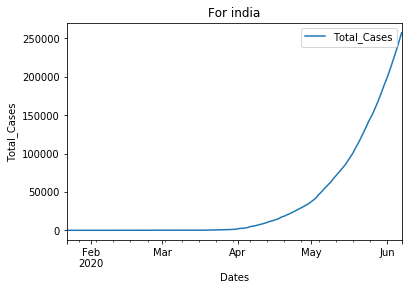

In [9]:
plot_for_any('India')

***plotting bar chart for top 10 affected countries***

In [9]:
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551
1,Albania,0,0,0,0,0,0,0,0,0,...,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232
2,Algeria,0,0,0,0,0,0,0,0,0,...,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050
3,Andorra,0,0,0,0,0,0,0,0,0,...,763,764,764,764,765,844,851,852,852,852
4,Angola,0,0,0,0,0,0,0,0,0,...,74,81,84,86,86,86,86,86,86,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,446,446,447,448,449,451,457,464,464,464
184,Western Sahara,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
185,Yemen,0,0,0,0,0,0,0,0,0,...,278,283,310,323,354,399,419,453,469,482
186,Zambia,0,0,0,0,0,0,0,0,0,...,1057,1057,1057,1057,1089,1089,1089,1089,1089,1089


**selected only necessary columns**


In [10]:
df_last = df[["Country/Region","6/6/20"]]


In [11]:
df_last

,Country/Region,6/6/20
0,Afghanistan,19551
1,Albania,1232
2,Algeria,10050
3,Andorra,852
4,Angola,88
...,...,...
183,West Bank and Gaza,464
184,Western Sahara,9
185,Yemen,482
186,Zambia,1089


**changing the columns name**

In [12]:
df_last.columns = ["Country","Total_Cases"]

**sorted the total cases column by descending order and collecting only 10 datas**

In [13]:
df_new = df_last.sort_values("Total_Cases",ascending=False).head(10)

In [14]:
df_new

,Country,Total_Cases
174,US,1920061
23,Brazil,672846
140,Russia,458102
178,United Kingdom,286294
79,India,246622
158,Spain,241310
85,Italy,234801
134,Peru,191758
62,France,190759
66,Germany,185450


**Now plotting bar chart for all these countries**

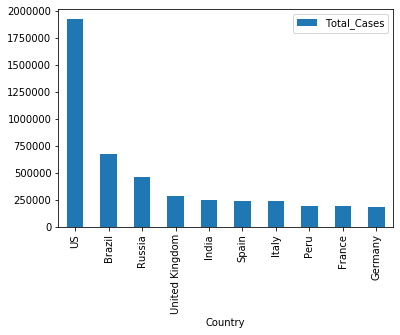

In [15]:
df_new.plot(kind="bar",x="Country",y="Total_Cases")
plt.show()

finding the increase in daily cases of all the countries

In [17]:
df_tr = df.set_index("Country/Region").T

In [18]:
df_tr.diff()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/2/20,759.0,21.0,113.0,79.0,0.0,0.0,904.0,517.0,8.0,26.0,...,1656.0,1.0,58.0,157.0,0.0,2.0,0.0,45.0,0.0,3.0
6/3/20,758.0,20.0,107.0,7.0,0.0,0.0,949.0,515.0,11.0,12.0,...,1878.0,2.0,83.0,133.0,0.0,6.0,0.0,20.0,0.0,16.0
6/4/20,787.0,13.0,98.0,1.0,0.0,0.0,929.0,697.0,7.0,34.0,...,1809.0,4.0,96.0,135.0,0.0,7.0,0.0,34.0,0.0,15.0
6/5/20,915.0,15.0,104.0,0.0,0.0,0.0,840.0,596.0,5.0,38.0,...,1655.0,2.0,68.0,58.0,0.0,0.0,0.0,16.0,0.0,28.0


In [19]:
df_tr_diff = df_tr.diff().replace(np.nan,0.0)
df_tr_diff

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/2/20,759.0,21.0,113.0,79.0,0.0,0.0,904.0,517.0,8.0,26.0,...,1656.0,1.0,58.0,157.0,0.0,2.0,0.0,45.0,0.0,3.0
6/3/20,758.0,20.0,107.0,7.0,0.0,0.0,949.0,515.0,11.0,12.0,...,1878.0,2.0,83.0,133.0,0.0,6.0,0.0,20.0,0.0,16.0
6/4/20,787.0,13.0,98.0,1.0,0.0,0.0,929.0,697.0,7.0,34.0,...,1809.0,4.0,96.0,135.0,0.0,7.0,0.0,34.0,0.0,15.0
6/5/20,915.0,15.0,104.0,0.0,0.0,0.0,840.0,596.0,5.0,38.0,...,1655.0,2.0,68.0,58.0,0.0,0.0,0.0,16.0,0.0,28.0


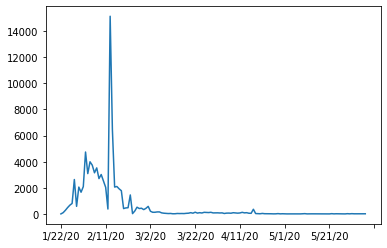

In [20]:
df_tr_diff['China'].plot()

In [25]:
def daily_cases(country_name):
    df_tr_diff[country_name].plot()
    plt.show()

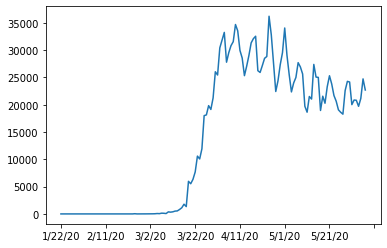

In [26]:
daily_cases("US")


# bar plot for the top 10 country which has most incresed  daily cases 

In [28]:
df_tr_diff

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/2/20,759.0,21.0,113.0,79.0,0.0,0.0,904.0,517.0,8.0,26.0,...,1656.0,1.0,58.0,157.0,0.0,2.0,0.0,45.0,0.0,3.0
6/3/20,758.0,20.0,107.0,7.0,0.0,0.0,949.0,515.0,11.0,12.0,...,1878.0,2.0,83.0,133.0,0.0,6.0,0.0,20.0,0.0,16.0
6/4/20,787.0,13.0,98.0,1.0,0.0,0.0,929.0,697.0,7.0,34.0,...,1809.0,4.0,96.0,135.0,0.0,7.0,0.0,34.0,0.0,15.0
6/5/20,915.0,15.0,104.0,0.0,0.0,0.0,840.0,596.0,5.0,38.0,...,1655.0,2.0,68.0,58.0,0.0,0.0,0.0,16.0,0.0,28.0


In [34]:
df_daily = df_tr_diff.tail(1).T
df_daily

,6/6/20
Country/Region,
Afghanistan,582.0
Albania,20.0
Algeria,115.0
Andorra,0.0
Angola,2.0
...,...
West Bank and Gaza,0.0
Western Sahara,0.0
Yemen,13.0


In [56]:
df_daily_new = df_daily.sort_values("6/6/20",ascending=False)

In [58]:
df_daily_new_10 = df_daily_new.head(10)

In [66]:
df_col = df_daily_new_10.reset_index()


In [67]:
df_col

,Country/Region,6/6/20
0,Brazil,27075.0
1,US,22681.0
2,India,10438.0
3,Russia,8846.0
4,Chile,5246.0
5,Pakistan,4734.0
6,Peru,4358.0
7,Mexico,3593.0
8,Saudi Arabia,3121.0
9,Bangladesh,2635.0


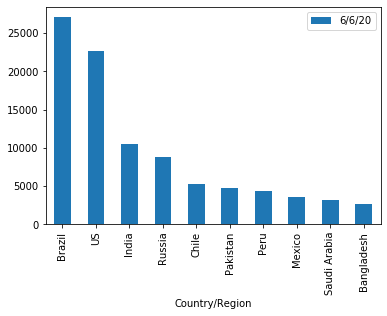

In [68]:
df_col.plot(kind="bar",x="Country/Region",y="6/6/20")
plt.show()